1. Import library and prepare webcam

In [1]:
import cv2 
import numpy as np 
import os
import matplotlib.pyplot as plt 
import time 
import mediapipe as mp

In [2]:
mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils                  

In [3]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image.flags.writeable = False                  
    results = model.process(image)                
    image.flags.writeable = True                   
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) 
    return image, results

In [4]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION)
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) 
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) 
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) 

In [5]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [6]:
cap = cv2.VideoCapture(0)
with mp_holistic.Holistic(min_detection_confidence=0.7,min_tracking_confidence=0.7) as holistic:
    while cap.isOpened():
        ret,frame = cap.read()
        image,results = mediapipe_detection(frame,holistic)
        print(results)
        draw_styled_landmarks(image,results)
        cv2.imshow('My WebCam',image)
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [8]:
len(results.face_landmarks.landmark)

468

In [9]:
len(results.pose_landmarks.landmark)

33

In [11]:
len(results.left_hand_landmarks.landmark)

AttributeError: 'NoneType' object has no attribute 'landmark'

In [12]:
print(results)

<class 'mediapipe.python.solution_base.SolutionOutputs'>


In [30]:
draw_landmarks(image,results)

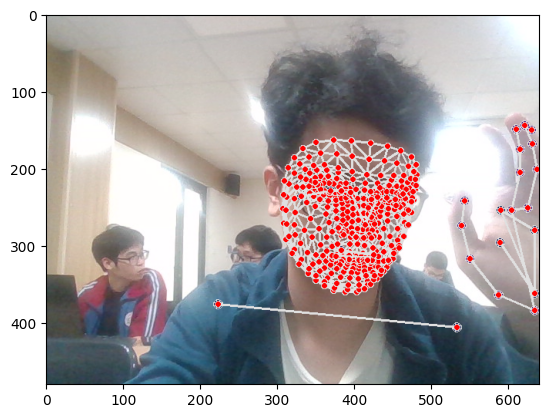

In [31]:
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))

2.Extract Keypoint Value

In [32]:
len(results.left_hand_landmarks.landmark)

21

In [33]:
results.face_landmarks

landmark {
  x: 0.629527271
  y: 0.647999763
  z: -0.0273052417
}
landmark {
  x: 0.641044796
  y: 0.597845733
  z: -0.0595438108
}
landmark {
  x: 0.634065449
  y: 0.609826565
  z: -0.0284545422
}
landmark {
  x: 0.634038
  y: 0.53835535
  z: -0.0508355834
}
landmark {
  x: 0.643531382
  y: 0.581730127
  z: -0.0646334067
}
landmark {
  x: 0.64465332
  y: 0.558407545
  z: -0.0617880672
}
landmark {
  x: 0.645190477
  y: 0.498295754
  z: -0.0361639597
}
landmark {
  x: 0.552099407
  y: 0.470066756
  z: -0.00768678263
}
landmark {
  x: 0.648152649
  y: 0.456493139
  z: -0.0325779952
}
landmark {
  x: 0.651045
  y: 0.434384704
  z: -0.037445318
}
landmark {
  x: 0.657912612
  y: 0.349790156
  z: -0.0327173136
}
landmark {
  x: 0.628301919
  y: 0.655964434
  z: -0.0249812026
}
landmark {
  x: 0.62674886
  y: 0.661350429
  z: -0.0203454606
}
landmark {
  x: 0.625391304
  y: 0.662893414
  z: -0.0146204373
}
landmark {
  x: 0.625683606
  y: 0.664609611
  z: -0.0123108067
}
landmark {
  x: 0.6

In [34]:
results.left_hand_landmarks

landmark {
  x: 0.99153465
  y: 0.801655054
  z: 2.39963754e-007
}
landmark {
  x: 0.918190658
  y: 0.758841097
  z: -0.0262734983
}
landmark {
  x: 0.86021167
  y: 0.661610842
  z: -0.0289029535
}
landmark {
  x: 0.843677878
  y: 0.572520256
  z: -0.0316263027
}
landmark {
  x: 0.84890753
  y: 0.506072223
  z: -0.0321826339
}
landmark {
  x: 0.944065571
  y: 0.530748487
  z: 0.0134632885
}
landmark {
  x: 0.961865187
  y: 0.427946687
  z: 0.00560911139
}
landmark {
  x: 0.961307406
  y: 0.364596784
  z: -0.00719293673
}
landmark {
  x: 0.953911841
  y: 0.312398612
  z: -0.0183992796
}
landmark {
  x: 0.97702539
  y: 0.524631858
  z: 0.0132864416
}
landmark {
  x: 0.996815801
  y: 0.420401096
  z: 0.00479889661
}
landmark {
  x: 0.987315
  y: 0.351840973
  z: -0.00869160425
}
landmark {
  x: 0.971093893
  y: 0.300984383
  z: -0.0193359982
}
landmark {
  x: 1.00255108
  y: 0.529343605
  z: 0.00630818168
}
landmark {
  x: 1.01563084
  y: 0.427255958
  z: -0.00792363
}
landmark {
  x: 1.0

In [35]:
results.pose_landmarks

landmark {
  x: 0.647807837
  y: 0.569366217
  z: -1.54163241
  visibility: 0.999751687
}
landmark {
  x: 0.67242825
  y: 0.494246423
  z: -1.46432841
  visibility: 0.999577
}
landmark {
  x: 0.690855324
  y: 0.497230947
  z: -1.46438742
  visibility: 0.999572754
}
landmark {
  x: 0.709205
  y: 0.500160396
  z: -1.46420479
  visibility: 0.999489725
}
landmark {
  x: 0.618613958
  y: 0.482223809
  z: -1.483814
  visibility: 0.999626398
}
landmark {
  x: 0.598621249
  y: 0.478576779
  z: -1.48331308
  visibility: 0.999649584
}
landmark {
  x: 0.577548742
  y: 0.47740373
  z: -1.48377681
  visibility: 0.99963361
}
landmark {
  x: 0.7107777
  y: 0.516863346
  z: -0.841699898
  visibility: 0.999556482
}
landmark {
  x: 0.517744482
  y: 0.493697762
  z: -0.924859524
  visibility: 0.999800205
}
landmark {
  x: 0.664897323
  y: 0.651836157
  z: -1.29382467
  visibility: 0.999698877
}
landmark {
  x: 0.599610627
  y: 0.638707519
  z: -1.31814969
  visibility: 0.999783218
}
landmark {
  x: 0.833

In [6]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x,res.y,res.z,res.visibility])
    pose.append(test)

NameError: name 'results' is not defined

In [7]:
def extract_keypoints(results):
    pose = np.array([[res.x,res.y,res.z,res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
    face = np.array([[res.x,res.y,res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3) 
    left_hand = np.array([[res.x,res.y,res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    right_hand = np.array([[res.x,res.y,res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, left_hand, right_hand]) 

In [38]:
result_test = extract_keypoints(results)

In [39]:
result_test

array([ 0.64780784,  0.56936622, -1.54163241, ...,  0.        ,
        0.        ,  0.        ])

In [40]:
len(result_test)

1662

In [41]:
np.save('0',result_test)

In [42]:
np.load('0.npy')

array([ 0.64780784,  0.56936622, -1.54163241, ...,  0.        ,
        0.        ,  0.        ])

3. Set up folders for collection

In [8]:
DATA_PATH = os.path.join('training_data')
actions = np.array(['cat','computer','deaf','dog','guitar','hello','i_love_you','internet','laptop','me','morning','no','park','play','sorry','sun','thank_you','toast','weather','yes'])
no_sequences = 30
sequence_length = 30

In [10]:
for action in actions:
    for sequence in range(no_sequences):
        try:
            os.makedirs(os.path.join(DATA_PATH,action,str(sequence)))
        except:
            pass 

4. Collect keypoint values for training and testing


In [11]:
import glob

sequence_length = 100

for action in actions:
    # Find all video files in the action directory
    video_files = glob.glob(os.path.join('training_data', action, '*'))
    
    for sequence, video_path in enumerate(video_files):
        # Check if video file exists
        if not os.path.exists(video_path):
            print(f"Warning: Video file {video_path} not found. Skipping.")
            continue
        
        # Extract filename for display
        video_filename = os.path.basename(video_path)
        
        # Use video file instead of webcam
        cap = cv2.VideoCapture(video_path)
        
        with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
            for frame_num in range(sequence_length):
                ret, frame = cap.read()
                
                # If video ends before reaching sequence_length frames, exit loop
                if not ret:
                    print(f"Video {video_path} ended early at frame {frame_num}.")
                    break
                    
                image, results = mediapipe_detection(frame, holistic)
                print(results)    
                draw_styled_landmarks(image, results)
               
                if frame_num == 0:
                    cv2.putText(image, 'STARTING COLLECTION', (120,200),
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} from {}'.format(action, video_filename), (15,12),
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(500)
                else:
                    cv2.putText(image, 'Collecting frames for {} from {}'.format(action, video_filename), (15,12),
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    cv2.imshow('OpenCV Feed', image)
               
                keypoints = extract_keypoints(results)
                
                # Ensure destination directory exists
                os.makedirs(os.path.join(DATA_PATH, action, str(sequence)), exist_ok=True)
                
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)
                
                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
            
            cap.release()



cv2.destroyAllWindows()

Video training_data\cat\0 ended early at frame 0.
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base

5. Preprocess data and create labels and features

In [9]:
from sklearn.model_selection import train_test_split 
import torch 

In [10]:
label_map = {label:num for num,label in enumerate(actions)}

In [11]:
label_map

{'cat': 0,
 'computer': 1,
 'deaf': 2,
 'dog': 3,
 'guitar': 4,
 'hello': 5,
 'i_love_you': 6,
 'internet': 7,
 'laptop': 8,
 'me': 9,
 'morning': 10,
 'no': 11,
 'park': 12,
 'play': 13,
 'sorry': 14,
 'sun': 15,
 'thank_you': 16,
 'toast': 17,
 'weather': 18,
 'yes': 19}

writing sequence

In [17]:
sequences, labels = [], []
min_frames_required = 15  # Set a minimum threshold (adjust as needed)

for action in actions:
    # Get all sequence directories for this action
    action_dir = os.path.join(DATA_PATH, action)
    if not os.path.exists(action_dir):
        print(f"Warning: Directory {action_dir} not found. Skipping action {action}.")
        continue
        
    sequence_dirs = [d for d in os.listdir(action_dir) if os.path.isdir(os.path.join(action_dir, d))]
    
    for sequence in sequence_dirs:
        window = []
        valid_sequence = True
        sequence_path = os.path.join(action_dir, sequence)
        
        # Get all frame files for this sequence
        frame_files = sorted([os.path.basename(f) for f in glob.glob(os.path.join(sequence_path, "*.npy"))], 
                            key=lambda x: int(x.split('.')[0]))
        
        # Check if we have at least the minimum frames
        if len(frame_files) < min_frames_required:
            print(f"Warning: Too few frames in {sequence_path}. Found {len(frame_files)}, need at least {min_frames_required}. Skipping.")
            continue
            
        print(f"Processing sequence {sequence} for action {action} with {len(frame_files)} frames")
        
        # Process all available frame files
        for frame_file in frame_files:
            frame_path = os.path.join(sequence_path, frame_file)
                
            # Check if file is not empty (size > 0)
            if os.path.getsize(frame_path) == 0:
                print(f"Warning: Empty frame file {frame_path}. Skipping frame.")
                continue
                
            try:
                # Load the keypoints
                res = np.load(frame_path)
                
                # Check if data is valid (contains actual keypoints)
                if res.size == 0 or np.all(res == 0):
                    print(f"Warning: No keypoints detected in {frame_path}. Skipping frame.")
                    continue
                    
                window.append(res)
            except Exception as e:
                print(f"Error loading {frame_path}: {e}. Skipping frame.")
                continue
                
        if len(window) >= min_frames_required:
            # If sequence has fewer frames than the standard length, still use it
            sequences.append(window)
            labels.append(label_map[action])
            print(f"Successfully added sequence {sequence} for action {action} with {len(window)} frames")
        else:
            print(f"Warning: Not enough valid frames in sequence {sequence} for action {action}. Found {len(window)}, need {min_frames_required}. Skipping.")


Processing sequence 1 for action cat with 74 frames
Successfully added sequence 1 for action cat with 74 frames
Processing sequence 2 for action cat with 61 frames
Successfully added sequence 2 for action cat with 61 frames
Processing sequence 28 for action cat with 49 frames
Successfully added sequence 28 for action cat with 49 frames
Processing sequence 29 for action cat with 93 frames
Successfully added sequence 29 for action cat with 93 frames
Processing sequence 3 for action cat with 69 frames
Successfully added sequence 3 for action cat with 69 frames
Processing sequence 30 for action cat with 45 frames
Successfully added sequence 30 for action cat with 45 frames
Processing sequence 31 for action cat with 100 frames
Successfully added sequence 31 for action cat with 100 frames
Processing sequence 32 for action cat with 63 frames
Successfully added sequence 32 for action cat with 63 frames
Processing sequence 33 for action cat with 100 frames
Successfully added sequence 33 for act

loading sequence

In [92]:
import glob
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split

label_map = {label: num for num, label in enumerate(actions)}

# Directory path
DATA_PATH = os.path.join('training_data')  # Adjust if needed

# Load sequences and labels
sequences, labels = [], []
min_frames_required = 15  # Minimum frames threshold

for action in actions:
    # Get all sequence directories for this action
    action_dir = os.path.join(DATA_PATH, action)
    if not os.path.exists(action_dir):
        print(f"Warning: Directory {action_dir} not found. Skipping action {action}.")
        continue
        
    sequence_dirs = [d for d in os.listdir(action_dir) if os.path.isdir(os.path.join(action_dir, d))]
    
    for sequence in sequence_dirs:
        window = []
        sequence_path = os.path.join(action_dir, sequence)
        
        # Get all frame files for this sequence
        frame_files = sorted([os.path.basename(f) for f in glob.glob(os.path.join(sequence_path, "*.npy"))],
                            key=lambda x: int(x.split('.')[0]))
        
        # Check if we have at least the minimum frames
        if len(frame_files) < min_frames_required:
            print(f"Warning: Too few frames in {sequence_path}. Found {len(frame_files)}, need at least {min_frames_required}. Skipping.")
            continue
            
        # Process all available frame files
        for frame_file in frame_files:
            frame_path = os.path.join(sequence_path, frame_file)
            
            # Skip empty files
            if os.path.getsize(frame_path) == 0:
                continue
                
            try:
                # Load the keypoints
                res = np.load(frame_path)
                window.append(res)
            except Exception as e:
                print(f"Error loading {frame_path}: {e}")
                continue
                
        # Add the sequence if it has enough frames
        if len(window) >= min_frames_required:
            sequences.append(window)
            labels.append(label_map[action])
            print(f"Added sequence {sequence} for action {action} with {len(window)} frames")

# Convert to PyTorch tensors with padding
print(f"Total sequences collected: {len(sequences)}")
print(f"Preparing PyTorch tensors...")

# Find maximum sequence length
max_length = max(len(seq) for seq in sequences)
print(f"Maximum sequence length: {max_length}")

# Pad sequences to uniform length
X = []
for sequence in sequences:
    # Convert sequence to tensor
    seq_tensor = torch.tensor(np.array(sequence), dtype=torch.float32)
    
    # Calculate padding needed
    padding_length = max_length - len(sequence)
    
    if padding_length > 0:
        # Create padding with zeros matching the shape of a single frame
        frame_shape = seq_tensor.shape[1:]
        padding = torch.zeros((padding_length, *frame_shape), dtype=torch.float32)
        
        # Concatenate the sequence with padding
        padded_seq = torch.cat((seq_tensor, padding), dim=0)
        X.append(padded_seq)
    else:
        X.append(seq_tensor)

# Stack all sequences and convert labels
X = torch.stack(X)
y = torch.tensor(labels, dtype=torch.long)

print(f"Final data shape: {X.shape}")
print(f"Labels shape: {y.shape}")

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create DataLoaders
train_loader = DataLoader(TensorDataset(X_train, y_train), batch_size=4, shuffle=True)
test_loader = DataLoader(TensorDataset(X_test, y_test), batch_size=4, shuffle=False)

print(f"Training samples: {len(X_train)}")
print(f"Testing samples: {len(X_test)}")

Added sequence 1 for action cat with 74 frames
Added sequence 2 for action cat with 61 frames
Added sequence 28 for action cat with 49 frames
Added sequence 29 for action cat with 93 frames
Added sequence 3 for action cat with 69 frames
Added sequence 30 for action cat with 45 frames
Added sequence 31 for action cat with 100 frames
Added sequence 32 for action cat with 63 frames
Added sequence 33 for action cat with 100 frames
Added sequence 34 for action cat with 56 frames
Added sequence 35 for action cat with 100 frames
Added sequence 37 for action cat with 100 frames
Added sequence 39 for action cat with 79 frames
Added sequence 40 for action cat with 94 frames
Added sequence 43 for action cat with 35 frames
Added sequence 44 for action cat with 100 frames
Added sequence 45 for action cat with 73 frames
Added sequence 46 for action cat with 74 frames
Added sequence 47 for action cat with 71 frames
Added sequence 48 for action cat with 69 frames
Added sequence 50 for action cat with 

In [93]:
np.array(sequences).shape 

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (582,) + inhomogeneous part.

In [75]:
np.array(labels).shape

(582,)

padding sequence

In [94]:
sequence_arrays = []
for window in sequences:
    sequence_arrays.append(np.array(window))

# Get maximum length
max_length = max(len(seq) for seq in sequences)
print(f"Maximum sequence length: {max_length}")

# Pad sequences using PyTorch
X = []
for seq_array in sequence_arrays:
    # Convert to PyTorch tensor
    seq_tensor = torch.tensor(seq_array, dtype=torch.float32)
    
    # Calculate how much padding we need
    padding_length = max_length - len(seq_array)
    
    if padding_length > 0:
        # Create padding with zeros that matches the shape of a single frame
        frame_shape = seq_tensor.shape[1:]  # Get shape excluding sequence dimension
        padding = torch.zeros((padding_length, *frame_shape), dtype=torch.float32)
        
        # Concatenate the sequence with the padding
        padded_seq = torch.cat((seq_tensor, padding), dim=0)
        X.append(padded_seq)
    else:
        X.append(seq_tensor)

# Stack into a single tensor
X = torch.stack(X)
print(f"Final shape: {X.shape}")

# Convert labels to tensor
y = torch.tensor(labels, dtype=torch.long)

Maximum sequence length: 100
Final shape: torch.Size([582, 100, 1662])


In [77]:
X.shape

torch.Size([582, 100, 1662])

In [78]:
len(actions)

20

In [79]:
import torch.nn.functional as F 

In [80]:
y = F.one_hot(torch.tensor(labels)).numpy()
y = torch.from_numpy(y)

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state = 42)

In [96]:
X_train.shape

AttributeError: 'list' object has no attribute 'shape'

In [97]:
X_train[:,-1,:].shape

TypeError: list indices must be integers or slices, not tuple

In [84]:
X_train[0]

tensor([[ 0.5363,  0.4966, -1.3240,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.5335,  0.4927, -1.0290,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.5287,  0.4881, -1.0627,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [ 0.5405,  0.4411, -1.0694,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.5434,  0.4400, -1.1086,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000]])

In [85]:
y_train[0].shape

torch.Size([20])

In [86]:
X_test.shape

torch.Size([175, 100, 1662])

In [87]:
y_train.shape

torch.Size([407, 20])

In [88]:
y_test.shape

torch.Size([175, 20])

In [89]:
y_test[0]

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1])

In [90]:
print(type(X_train))
print(type(y_test))

<class 'torch.Tensor'>
<class 'torch.Tensor'>


In [71]:
from torch.utils.data import DataLoader,TensorDataset
#already tensor
train_loader = DataLoader((X_train, y_train), batch_size=4, shuffle=True)
test_loader = DataLoader((X_test, y_test), batch_size=4, shuffle=False)

In [98]:
print(len(train_loader))
print(len(test_loader))

117
30


6. Build and train model

In [99]:
import torch.nn as nn 
import torch.optim as optim
from torch.utils.tensorboard import SummaryWriter

In [100]:
log_dir = os.path.join('Logs')
writter = SummaryWriter(log_dir)
print(writter)

In [101]:
class LSTMModel(nn.Module):
    def __init__(self,input_size,hidden_size_1,hidden_size_2,hidden_size_3,output_size):
        super(LSTMModel,self).__init__()
        self.lstm1 = nn.LSTM(input_size,hidden_size_1,num_layers=1,batch_first=True)
        self.dropout1 = nn.Dropout(0.3)
        self.fc1 = nn.Linear(hidden_size_1,64)
        self.relu = nn.ReLU()
        self.fc2= nn.Linear(64,output_size)
    
    def forward(self,x):
        x, _ = self.lstm1(x)
        x = x[:,-1,:]
        x = self.dropout1(x)
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x 


In [102]:
input_size = 1662
hidden_size_1 = 64
hidden_size_2 = 128
hidden_size_3 = 64
output_size = len(actions)
model = LSTMModel(input_size,hidden_size_1,hidden_size_2,hidden_size_3,output_size)

In [103]:

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [104]:
model = model.to(device)

In [105]:
print(model)

LSTMModel(
  (lstm1): LSTM(1662, 64, batch_first=True)
  (dropout1): Dropout(p=0.3, inplace=False)
  (fc1): Linear(in_features=64, out_features=64, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=64, out_features=20, bias=True)
)


In [106]:
optimizer = optim.Adam(model.parameters(),lr=0.01)
loss_function = nn.CrossEntropyLoss()

In [107]:
res = [.1,.2,.3]
print(actions[np.argmax(res)])

deaf


In [108]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

standardize all sequence

In [95]:
# Alternative approach: Standardize all sequences upfront
standardized_sequences = []
standardized_labels = []

# Process each sequence to ensure consistent shape
for i, seq in enumerate(sequences):
    try:
        # Convert to numpy array if it's not already
        if not isinstance(seq, np.ndarray):
            seq_array = np.array(seq)
        else:
            seq_array = seq

        # Flatten each frame to 1D if needed
        if seq_array.ndim > 2:
            # Keep sequence length dimension, flatten others
            flat_seq = np.array([frame.flatten() for frame in seq_array])
        else:
            flat_seq = seq_array
            
        standardized_sequences.append(flat_seq)
        standardized_labels.append(labels[i])
    except Exception as e:
        print(f"Error processing sequence {i}: {e}")

# Now proceed with the standardized data
X_train, X_test, y_train, y_test = train_test_split(
    standardized_sequences, standardized_labels, test_size=0.2, random_state=42)

In [112]:
num_epochs = 200
best_accuracy = 0.0

for epoch in range(num_epochs):
    # Training phase
    model.train()
    train_loss = 0.0
    train_correct = 0
    train_total = 0
    
    for batch in train_loader:
        # Check what we're actually getting from the loader
        if len(batch) == 2:
            # If we only have x and y (no lengths)
            x, y = batch
            lengths = None
        else:
            # If we have all three elements
            x, y, lengths = batch
            
        x = x.float().to(device)
        y = y.long().to(device)
        
        # Forward pass
        output = model(x)
        
        # If we're using the last output from sequences
        if lengths is not None:
            # Get output from last valid frame for each sequence
            batch_size = x.size(0)
            final_outputs = []
            for i in range(batch_size):
                final_outputs.append(output[i, lengths[i]-1])
            final_output = torch.stack(final_outputs)
        else:
            # Otherwise use the last time step for all sequences
            final_output = output  # Last time step
        
        # Calculate loss
        loss = loss_function(final_output, y)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Track training progress
        train_loss += loss.item()
        _, predicted = torch.max(final_output.data, 1)
        train_total += y.size(0)
        train_correct += (predicted == y).sum().item()
    
    # Evaluation phase - similar changes needed here
    model.eval()
    test_loss = 0.0
    test_total = 0
    test_correct = 0
    
    with torch.no_grad():
        for batch in test_loader:
            if len(batch) == 2:
                x, y = batch
                lengths = None
            else:
                x, y, lengths = batch
                
            x = x.float().to(device)
            y = y.long().to(device)
            
            output = model(x)
            
            if lengths is not None:
                batch_size = x.size(0)
                final_outputs = []
                for i in range(batch_size):
                    final_outputs.append(output[i, lengths[i]-1])
                final_output = torch.stack(final_outputs)
            else:
                final_output = output
            
            loss = loss_function(final_output, y)
            
            test_loss += loss.item()
            _, predicted = torch.max(final_output.data, 1)
            test_total += y.size(0)
            test_correct += (predicted == y).sum().item()
    
    # Calculate metrics
    train_accuracy = (100 * train_correct) / train_total
    train_avg_loss = train_loss / len(train_loader)
    test_accuracy = (100 * test_correct) / test_total
    test_avg_loss = test_loss / len(test_loader)
    
    # Print progress
    print(f'Epoch {epoch+1}/{num_epochs}')
    print(f'Train Loss: {train_avg_loss:.4f}, Train Accuracy: {train_accuracy:.2f}%')
    print(f'Test Loss: {test_avg_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%')

Epoch 1/200
Train Loss: 3.0328, Train Accuracy: 4.09%
Test Loss: 3.0109, Test Accuracy: 6.84%
Epoch 2/200
Train Loss: 3.0143, Train Accuracy: 3.44%
Test Loss: 3.0172, Test Accuracy: 5.13%
Epoch 3/200
Train Loss: 3.0070, Train Accuracy: 6.24%
Test Loss: 3.0641, Test Accuracy: 7.69%
Epoch 4/200
Train Loss: 3.0030, Train Accuracy: 5.81%
Test Loss: 3.0279, Test Accuracy: 3.42%
Epoch 5/200
Train Loss: 2.9991, Train Accuracy: 5.59%
Test Loss: 3.0467, Test Accuracy: 6.84%
Epoch 6/200
Train Loss: 3.0031, Train Accuracy: 6.02%
Test Loss: 3.0258, Test Accuracy: 5.13%
Epoch 7/200
Train Loss: 2.9849, Train Accuracy: 5.38%
Test Loss: 3.0302, Test Accuracy: 4.27%
Epoch 8/200
Train Loss: 2.9811, Train Accuracy: 6.02%
Test Loss: 3.0558, Test Accuracy: 5.13%
Epoch 9/200
Train Loss: 2.9869, Train Accuracy: 7.31%
Test Loss: 3.0309, Test Accuracy: 4.27%
Epoch 10/200
Train Loss: 2.9715, Train Accuracy: 5.81%
Test Loss: 3.0367, Test Accuracy: 4.27%
Epoch 11/200
Train Loss: 2.9819, Train Accuracy: 6.02%
Test

KeyboardInterrupt: 